In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [3]:
df =  pd.read_csv('C:/Users/Anjil/Documents/gitit/Customer-Segmentation-K-means/Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# EDA's

#### Univariate Analysis

- Uni means "one", so the data has only one variable (univariate).
- Univariate statistics summarize only one variable at a time.

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


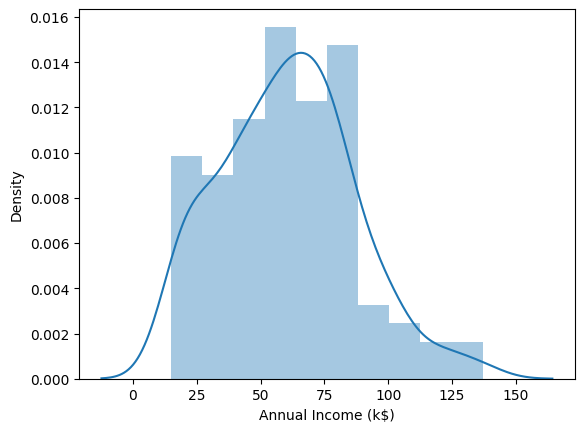

In [6]:
# visualizing the distribution of our data
sns.distplot(df['Annual Income (k$)']);

In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

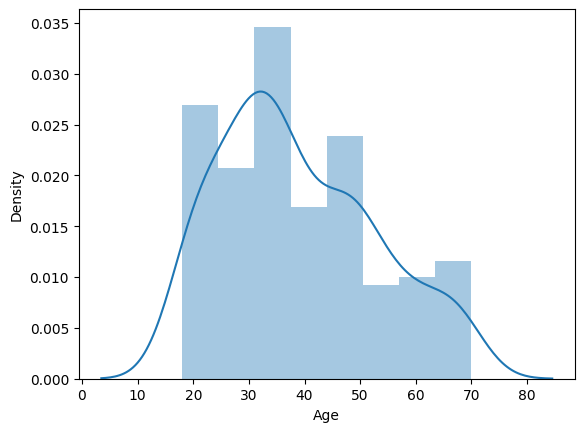

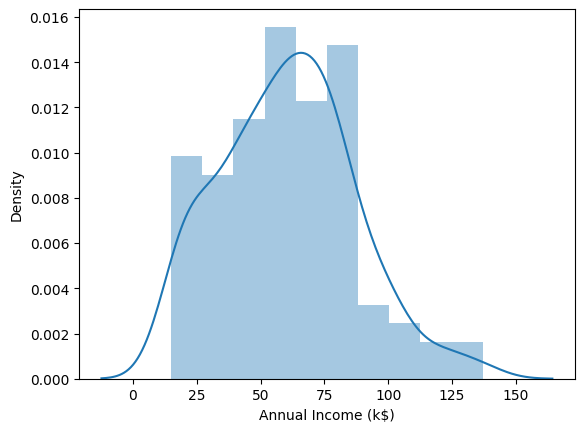

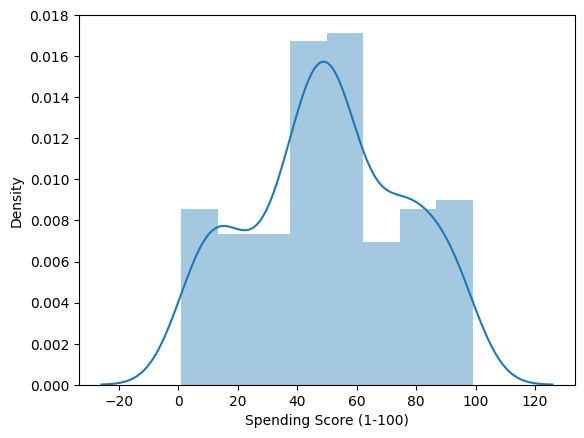

In [8]:
# visualizing all variables at once, separately
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()             # will create another figure in each loop
    sns.distplot(df[i])

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

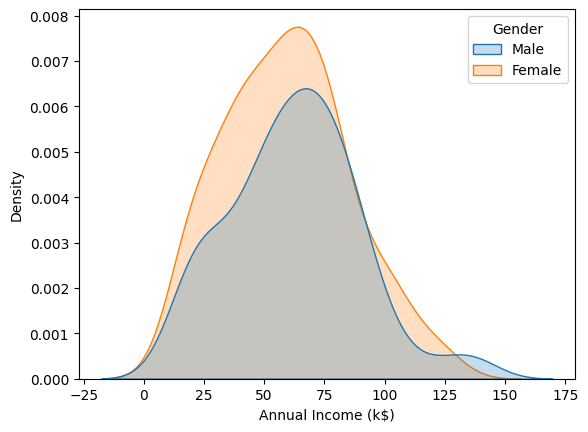

In [9]:
# Using kdePlot
# 'hue' breaks down those dimensions
sns.kdeplot(x='Annual Income (k$)', data=df, shade=True, hue='Gender')


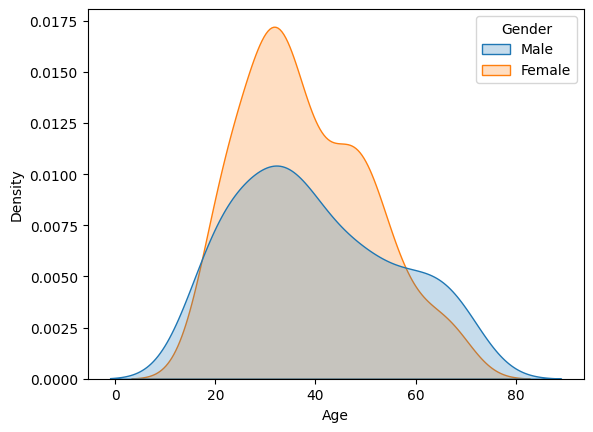

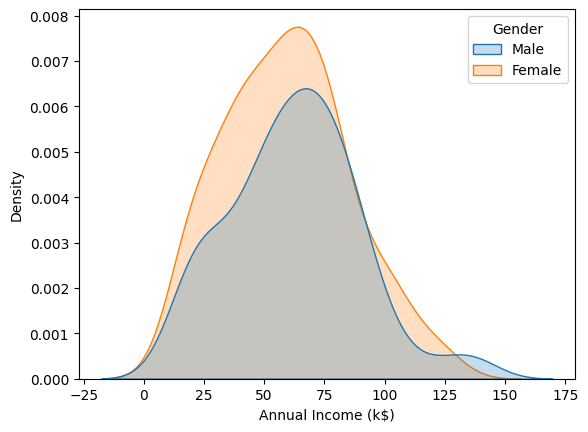

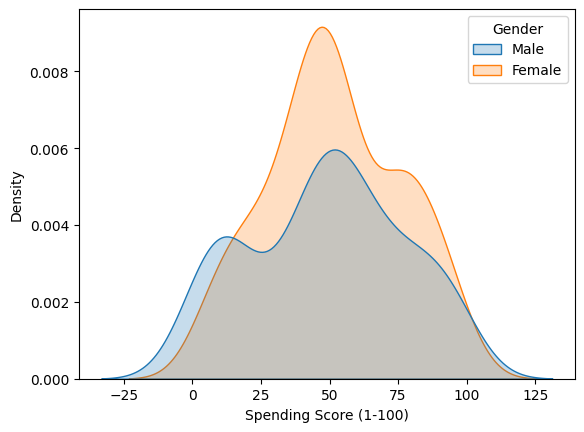

In [10]:
# let's visualize frequency with respect to gender for each variable
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()             
    sns.kdeplot(x=i, data=df, shade=True, hue='Gender')

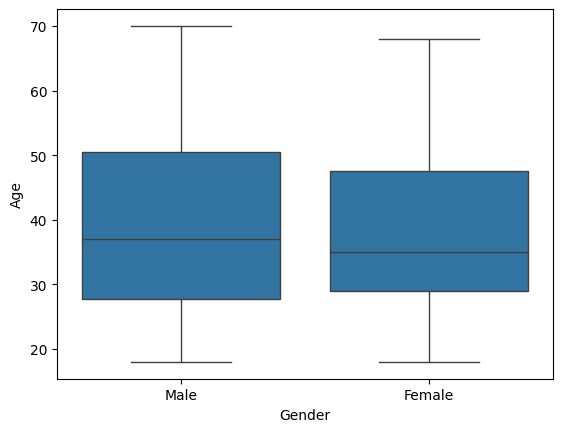

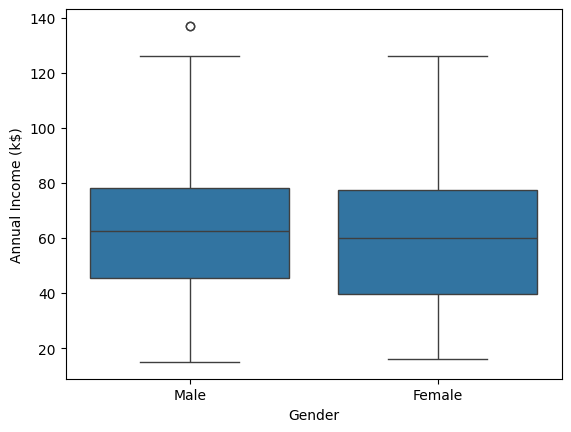

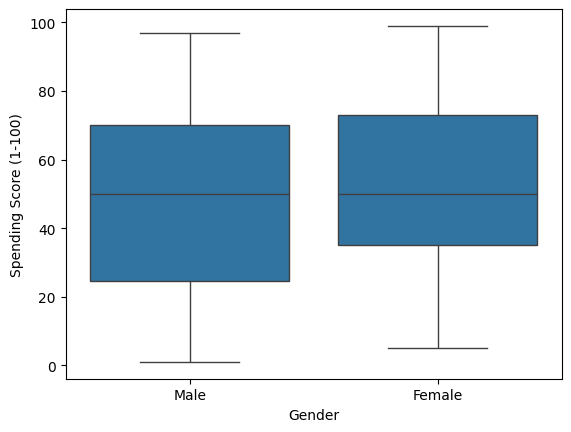

In [11]:
# visualizing using box plot
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()             
    sns.boxplot(data=df, x='Gender', y=df[i])

In [12]:
# just to get the ratio of male and female
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

#### Bivariate Analysis

- Howwever we discussed univariate analysis taking one variable. So, obviously Bivariate analysis look after two.

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

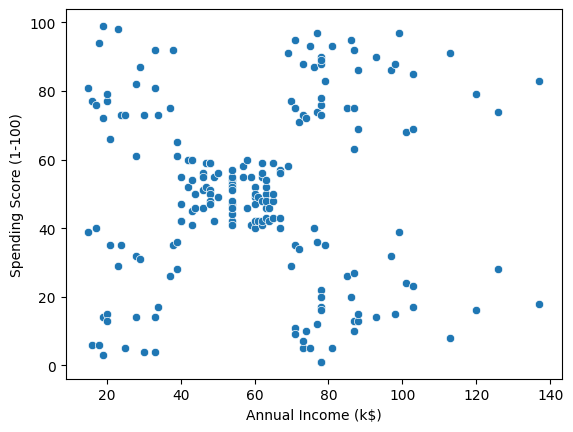

In [15]:
# let's look after scatter
sns.scatterplot(data=df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)')

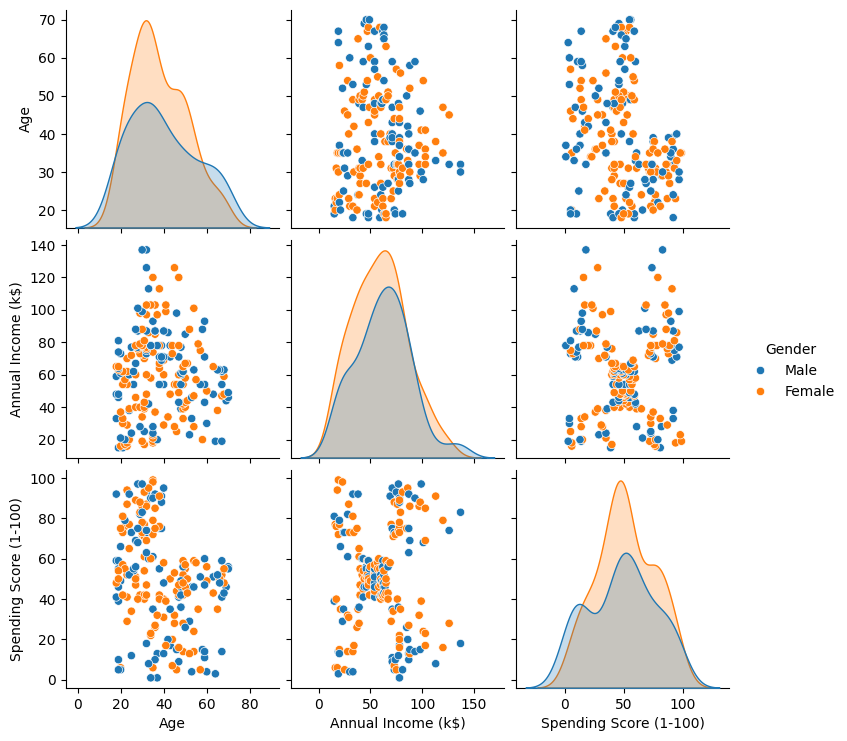

In [18]:
#df = df.drop('CustomerID', axis=1)
sns.pairplot(df, hue='Gender')

In [20]:
# how about looking out at mean of male and female
df.groupby(['Gender'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [23]:
# how might be the relations ?
df.corr(numeric_only=True)

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

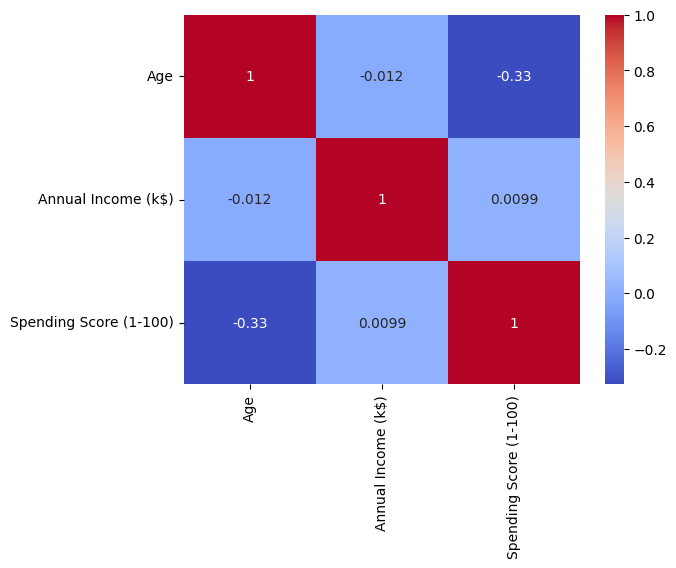

In [24]:
# more graphical view on visualizing correlations ?
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

# Clustering - Univariate, Bivariate, Multivariate

In [43]:
clustering1 = KMeans(n_clusters=3)

In [44]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [45]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [46]:
df['Income Cluster'] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0


In [47]:
df['Income Cluster'].value_counts()

Income Cluster
1    90
0    74
2    36
Name: count, dtype: int64

- Here, we will be using elbow method to find out what number of clusters are we going to use.

In [48]:
# initially lets find out cluster's intertia
# it gives the distance from the centroid
clustering1.inertia_

23517.330930930937

In [49]:
# so, To get the elbow method, let's loop over some range of number and find out the exact elbow point, which will be our number of clusters
inertia_scores = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [50]:
inertia_scores

[137277.28,
 48660.88888888889,
 23517.330930930937,
 13278.112713472485,
 8667.679614837509,
 5050.904761904762,
 3949.2756132756135,
 2871.6615995115994,
 2173.287445887446,
 1736.565651015651]

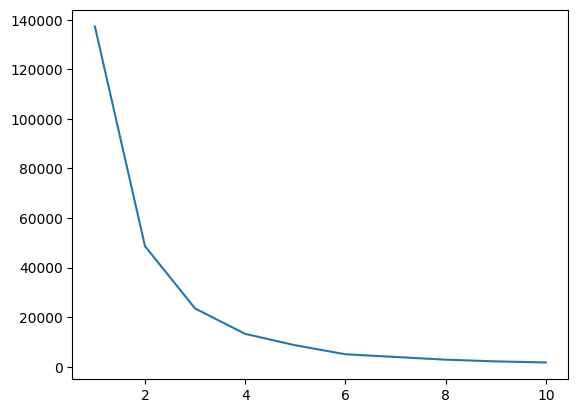

In [51]:
plt.plot(range(1,11), inertia_scores)

In [52]:
# on visualizing, Not so perfect, But, we can say, we can use 3 as number of clusters as the bend starts there

In [53]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster'],
      dtype='object')

In [55]:
# let's groupby our variables with income clusters

df.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.500000,33.486486,50.229730
1,38.722222,67.088889,50.000000
2,37.833333,99.888889,50.638889
